<a href="https://colab.research.google.com/github/foyezfar/ML/blob/main/Multiclass_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import shutil
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Data.zip","r")
Zip_ref.extractall("/tmp")
Zip_ref.close()

In [4]:
base_dir ="/tmp/Data/train"

In [5]:
import os
print(os.listdir("/tmp/Data/train"))

['CROW', 'PEACOCK', 'EMU', 'OSTRICH', 'WOOD DUCK', 'COCKATOO']


In [6]:
import numpy as np
import cv2
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense


In [7]:
IMAGE_SIZE=224
BATCH_SIZE=32

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 923 images belonging to 6 classes.
Found 100 images belonging to 6 classes.


In [8]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(6,activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn.fit(train_datagen,epochs=100,validation_data=test_datagen)

Epoch 1/100
29/29 [==============================] - 26s 854ms/step - loss: 1.7328 - accuracy: 0.2535 - val_loss: 1.5986 - val_accuracy: 0.2600
Epoch 2/100
29/29 [==============================] - 25s 847ms/step - loss: 1.4030 - accuracy: 0.5016 - val_loss: 1.0748 - val_accuracy: 0.7000
Epoch 3/100
29/29 [==============================] - 25s 850ms/step - loss: 0.9385 - accuracy: 0.6977 - val_loss: 0.9851 - val_accuracy: 0.6900
Epoch 4/100
29/29 [==============================] - 25s 848ms/step - loss: 0.7642 - accuracy: 0.7356 - val_loss: 0.8106 - val_accuracy: 0.7000
Epoch 5/100
29/29 [==============================] - 25s 849ms/step - loss: 0.6802 - accuracy: 0.7606 - val_loss: 0.7712 - val_accuracy: 0.7500
Epoch 6/100
29/29 [==============================] - 25s 846ms/step - loss: 0.6480 - accuracy: 0.7627 - val_loss: 0.7434 - val_accuracy: 0.7700
Epoch 7/100
29/29 [==============================] - 25s 848ms/step - loss: 0.5522 - accuracy: 0.8169 - val_loss: 0.6843 - val_accuracy:

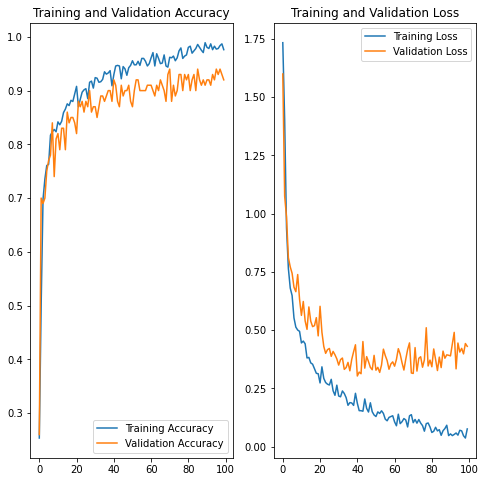

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
cnn.save('BirdClassification.h5')